In [10]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

In [5]:
data = pd.read_csv("D:/Dimond_prise_prediction_project/dataset/gemstone.csv")
data.head()

cvbcvbcvbcvbcvbcvbcvbcvbcvbcvbvbcv  carat        cut color clarity  depth  \
0                                   1   0.30      Ideal     E     SI1   62.1   
1                                   2   0.33    Premium     G      IF   60.8   
2                                   3   0.90  Very Good     E    VVS2   62.2   
3                                   4   0.42      Ideal     F     VS1   61.6   
4                                   5   0.31      Ideal     F    VVS1   60.4   

   table     x     y     z  price  
0   58.0  4.27  4.29  2.66    499  
1   58.0  4.42  4.46  2.70    984  
2   60.0  6.04  6.12  3.78   6289  
3   56.0  4.82  4.80  2.96   1082  
4   59.0  4.35  4.43  2.65    779

In [3]:
data.shape

(26967, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cvbcvbcvbcvbcvbcvbcvbcvbcvbcvbvbcv  26967 non-null  int64  
 1   carat                               26967 non-null  float64
 2   cut                                 26967 non-null  object 
 3   color                               26967 non-null  object 
 4   clarity                             26967 non-null  object 
 5   depth                               26270 non-null  float64
 6   table                               26967 non-null  float64
 7   x                                   26967 non-null  float64
 8   y                                   26967 non-null  float64
 9   z                                   26967 non-null  float64
 10  price                               26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory

The first column is an index ("Unnamed: 0") and thus we are going to remove it.
and the depth column having null values

In [5]:
#The first column seems to be just index
data = data.drop(["cvbcvbcvbcvbcvbcvbcvbcvbcvbcvbvbcv"], axis=1)
data.describe()

carat         depth         table             x             y  \
count  26967.000000  26270.000000  26967.000000  26967.000000  26967.000000   
mean       0.798375     61.745147     57.456080      5.729854      5.733569   
std        0.477745      1.412860      2.232068      1.128516      1.166058   
min        0.200000     50.800000     49.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.710000   
50%        0.700000     61.800000     57.000000      5.690000      5.710000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        4.500000     73.600000     79.000000     10.230000     58.900000   

                  z         price  
count  26967.000000  26967.000000  
mean       3.538057   3939.518115  
std        0.720624   4024.864666  
min        0.000000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2375.000000  
75%        4.040000   5360.000000  
max       31.800000  18818.000000

**Points to notice:**

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [6]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(26958, 10)

We lost 9 data points by deleting the dimensionless(2-D or 1-D) diamonds.

In [7]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

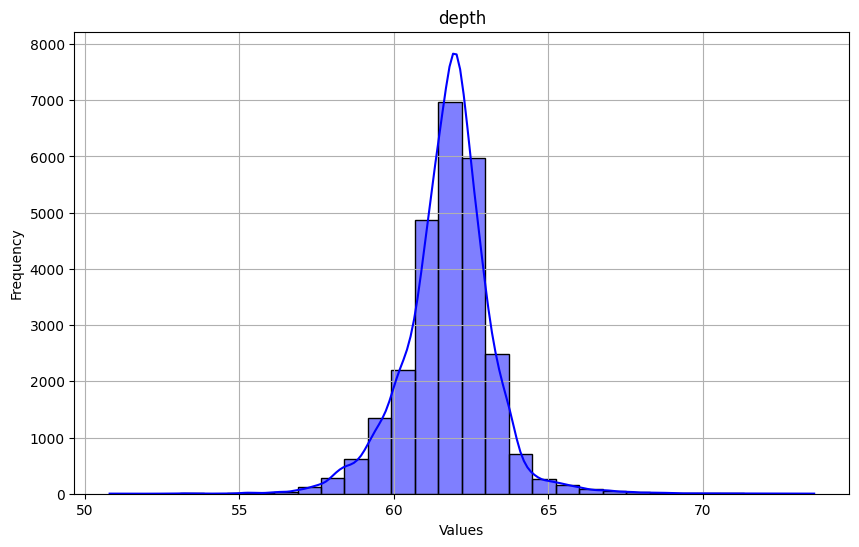

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['depth'], kde=True, bins=30, color='blue')
plt.title('depth')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

so the depth column is normally distributed 

In [9]:
data['depth'] = data['depth'].fillna(data['depth'].mean())
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Pairplot Of Data

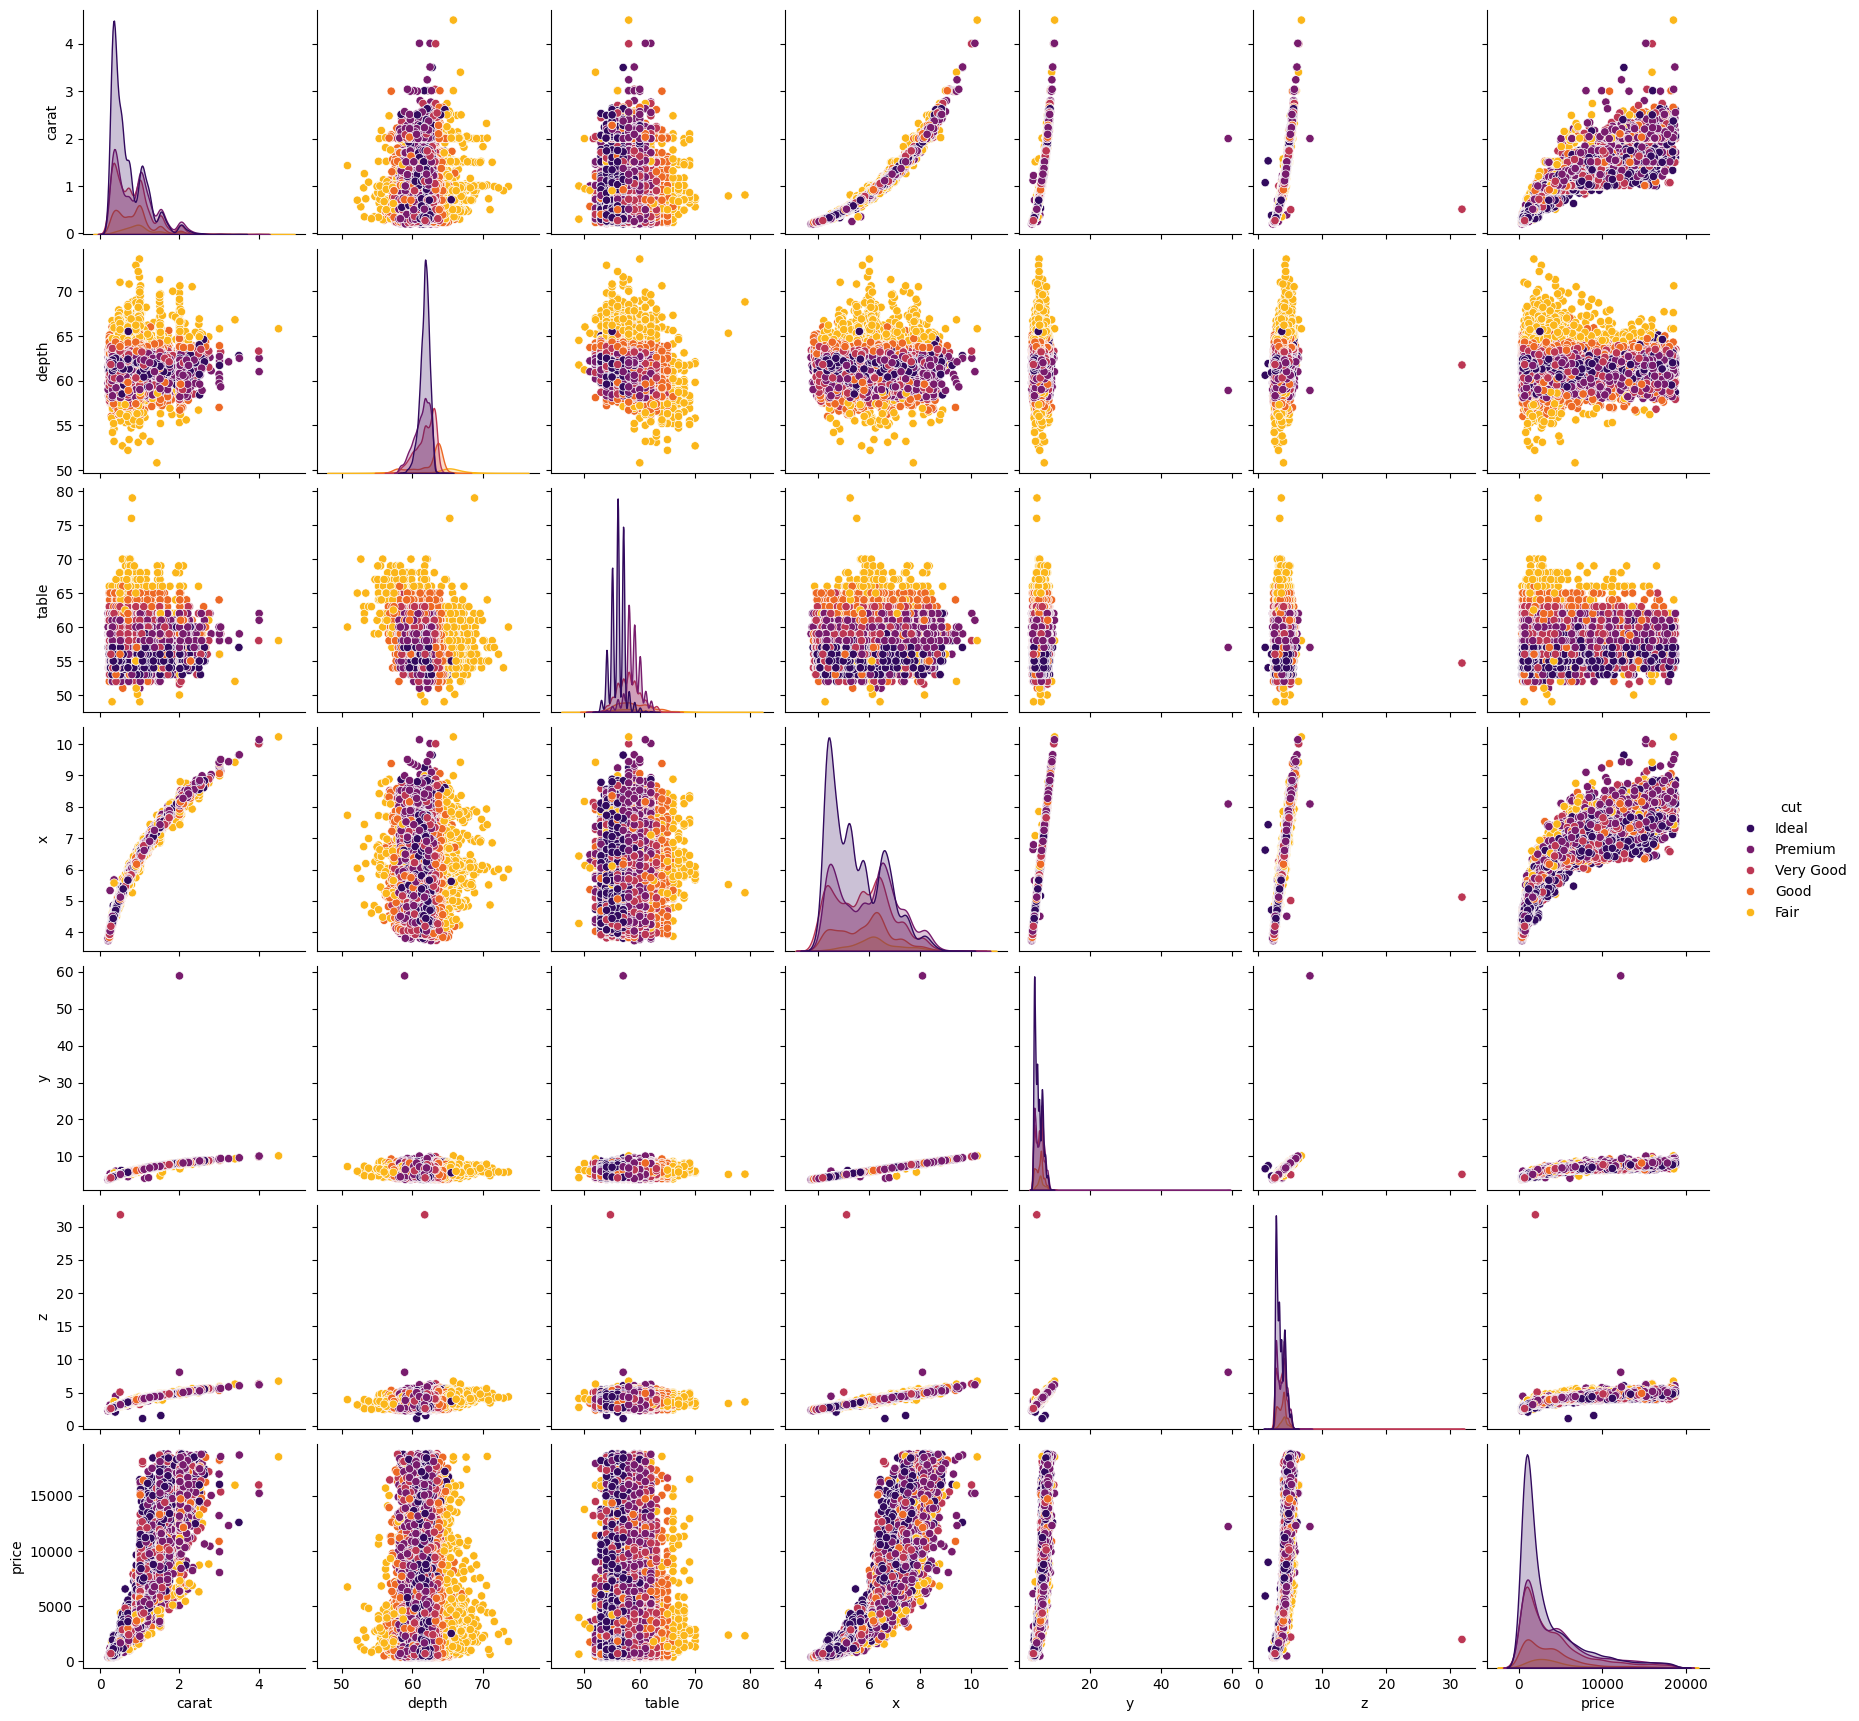

In [10]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, hue= "cut",palette = 'inferno')# I chose "cut" as hue. We can also examine other attributes in hue with less value count. 


**A few points to notice in these pair plots**

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

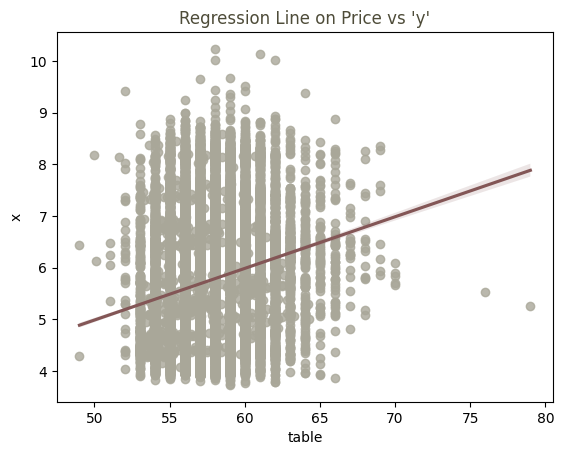

In [11]:
ax = sns.regplot(x="table", y="x", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

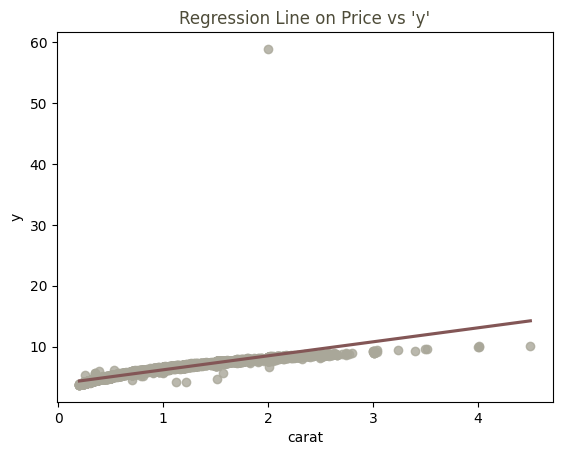

In [12]:
ax = sns.regplot(x="carat", y="y", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

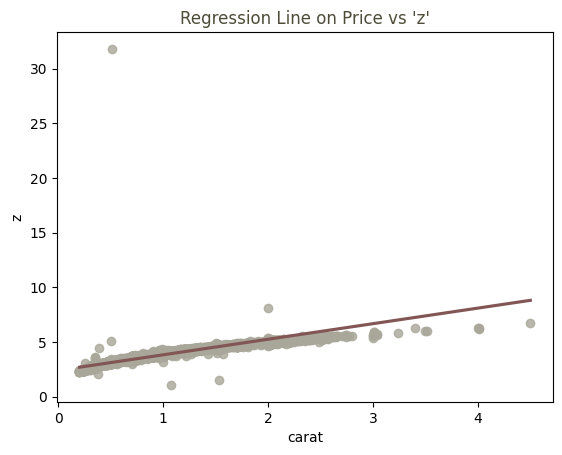

In [13]:
ax= sns.regplot(x="carat", y="z", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

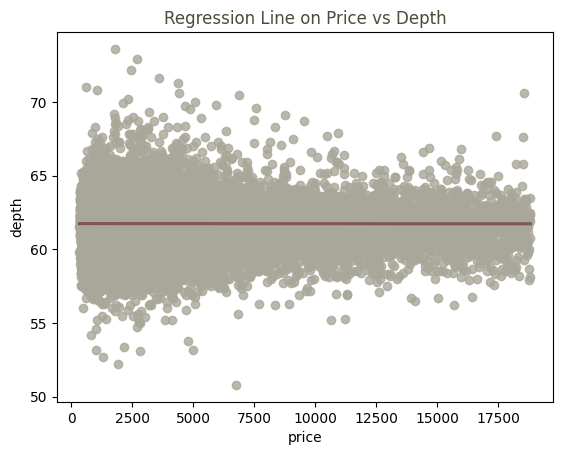

In [14]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

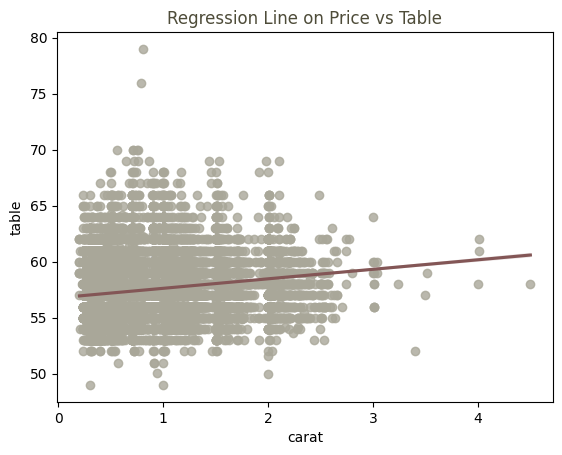

In [15]:
ax=sns.regplot(x="carat", y="table", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

We can clearly spot outliers in these attributes. Next up, we will remove these data points. 

In [16]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>50)]
data = data[(data["table"]<75)&(data["table"]>45)]
data = data[(data["x"]<10)&(data["x"]>2)]
data = data[(data["y"]<45)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(26948, 10)

We can clearly spot outliers in these attributes. Next up, we will remove these data points.Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand. 

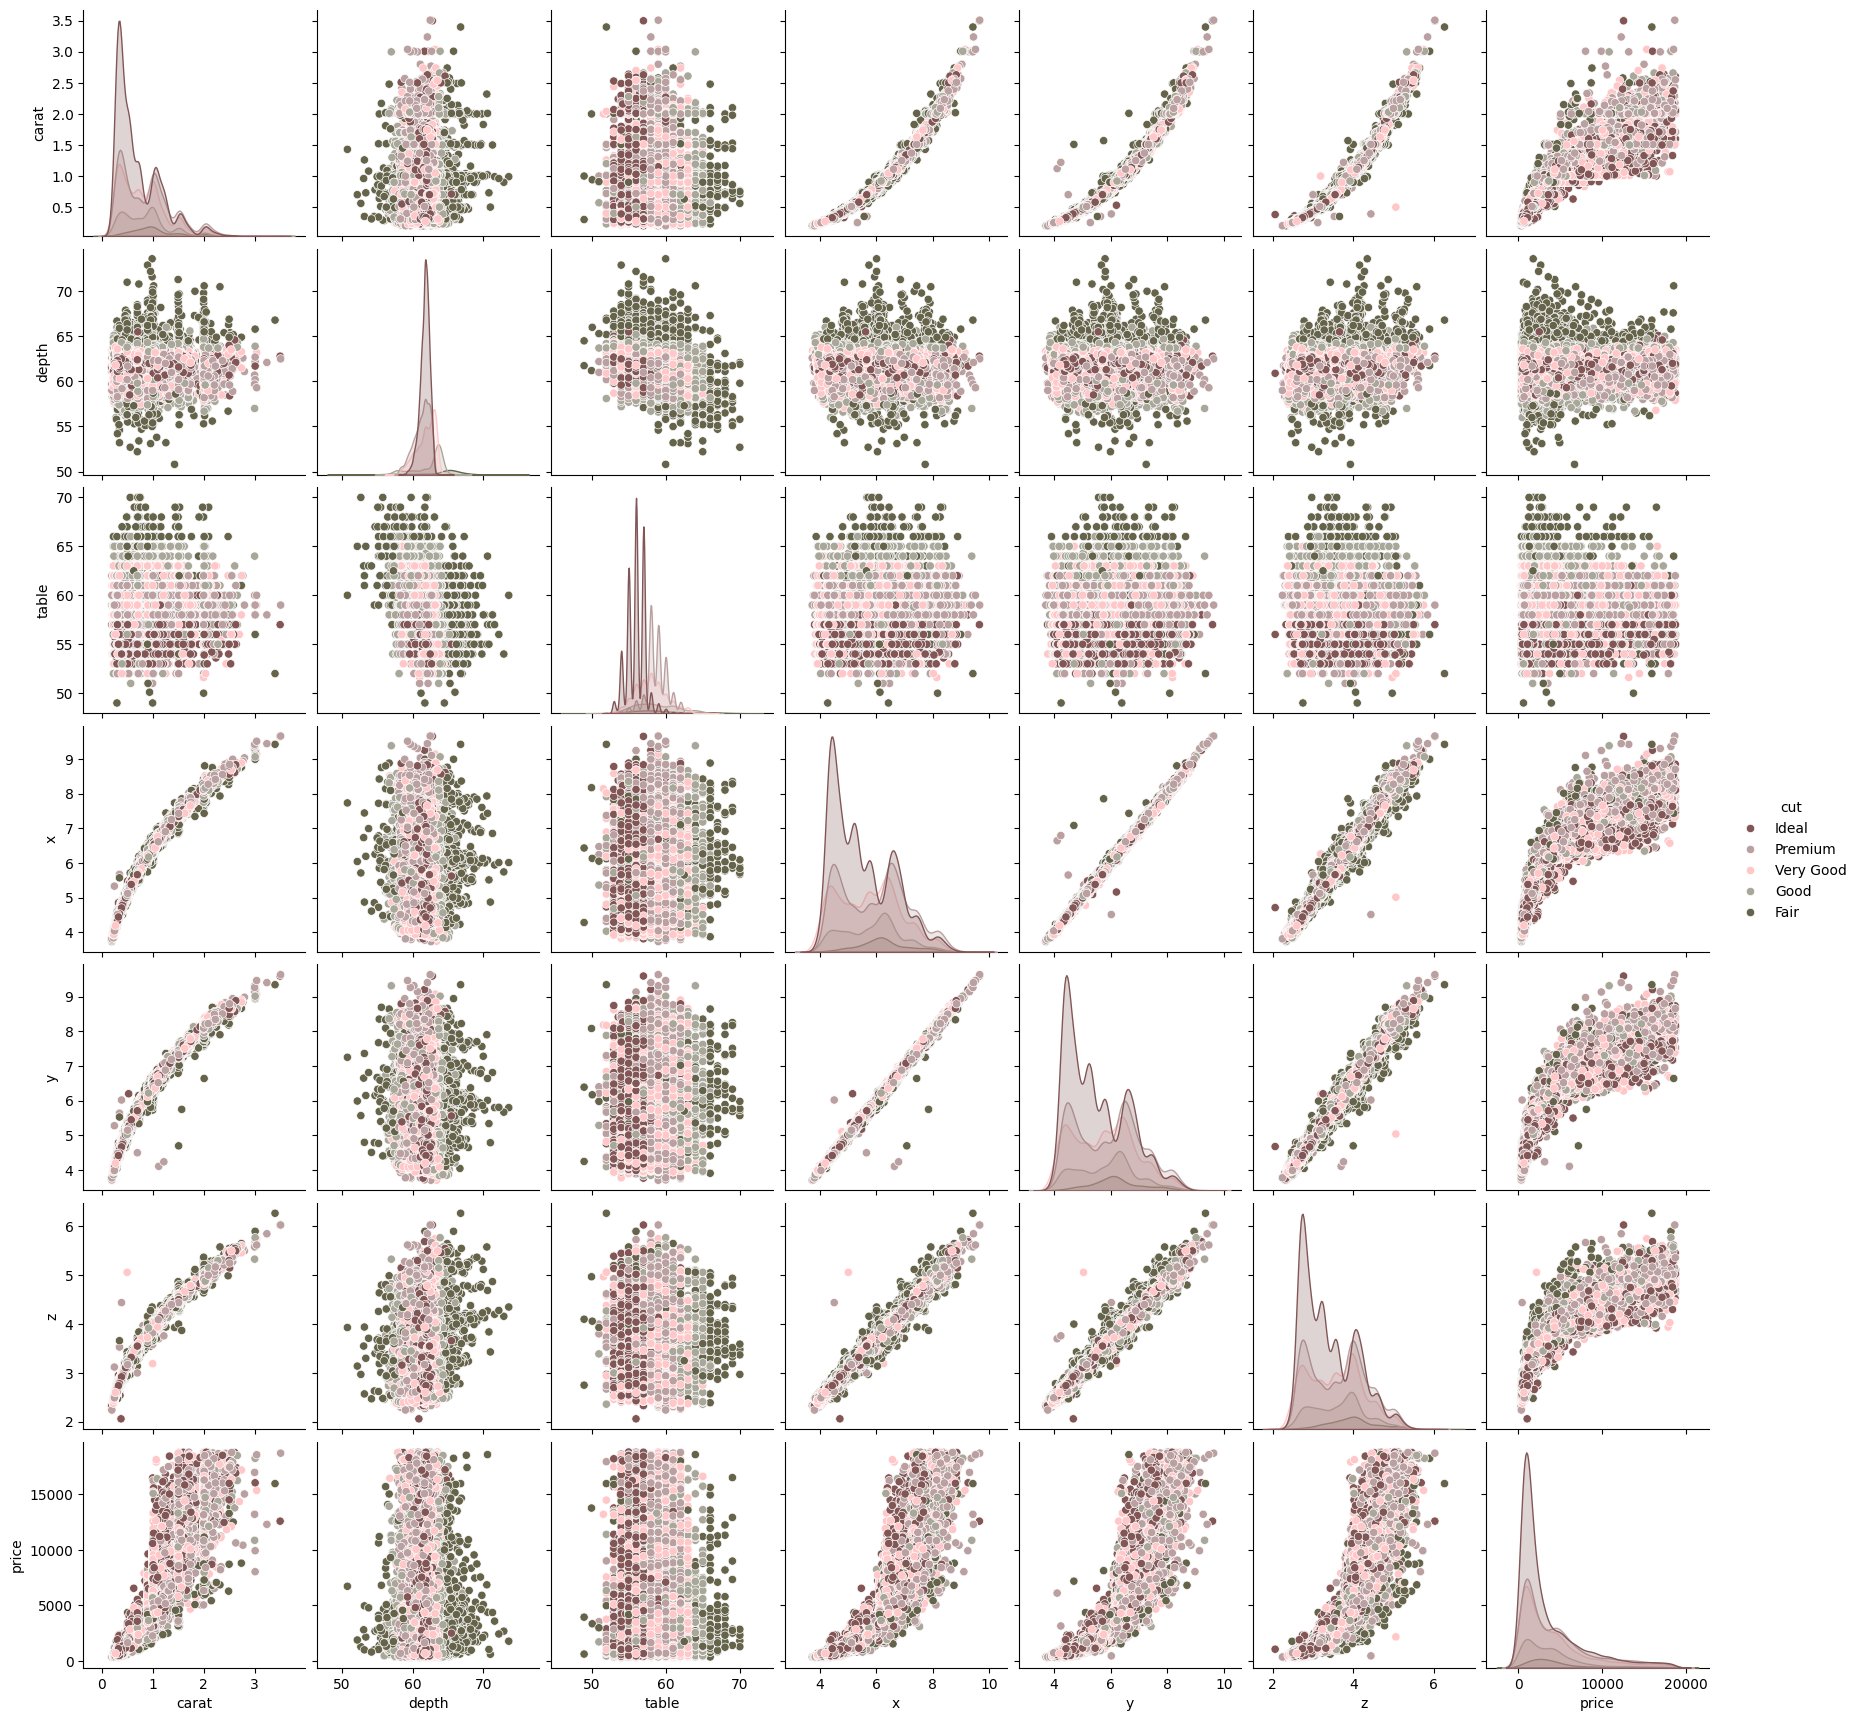

In [17]:
ax=sns.pairplot(data, hue= "cut",palette=shade)

That's a much cleaner dataset. 
Next, we will deal with the categorical variables. 

In [18]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


We have three categorical variables. 
Let us have a look at them.

C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\1915537534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")
C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\1915537534.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")


Text(0.5, 0, 'Cut')

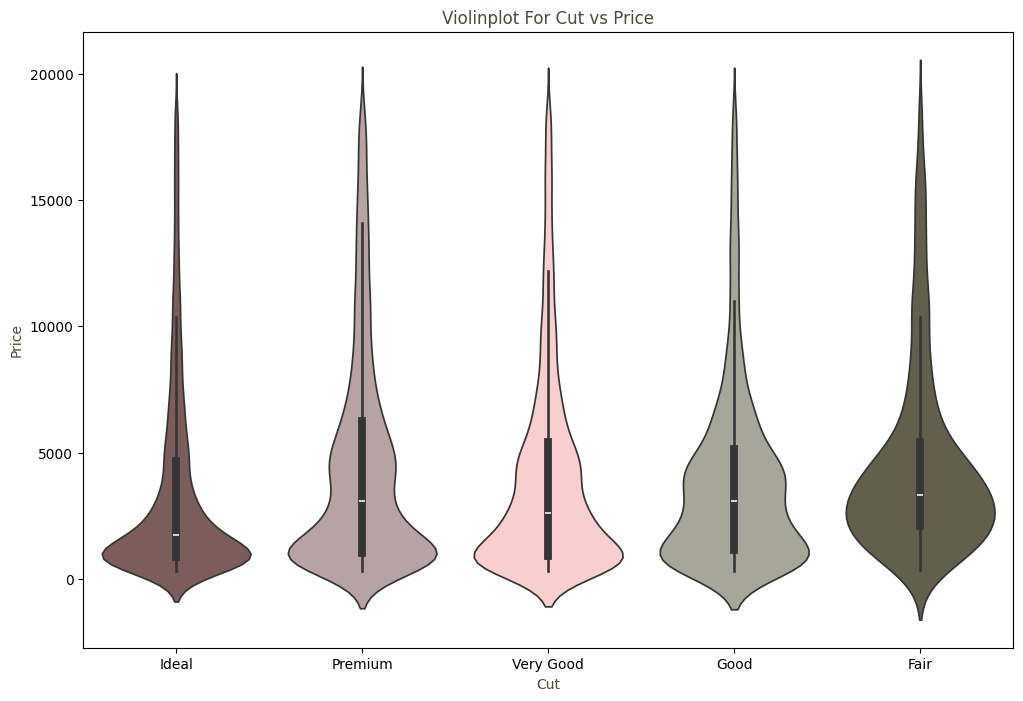

In [19]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\4010866692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")
C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\4010866692.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")


Text(0.5, 0, 'Color')

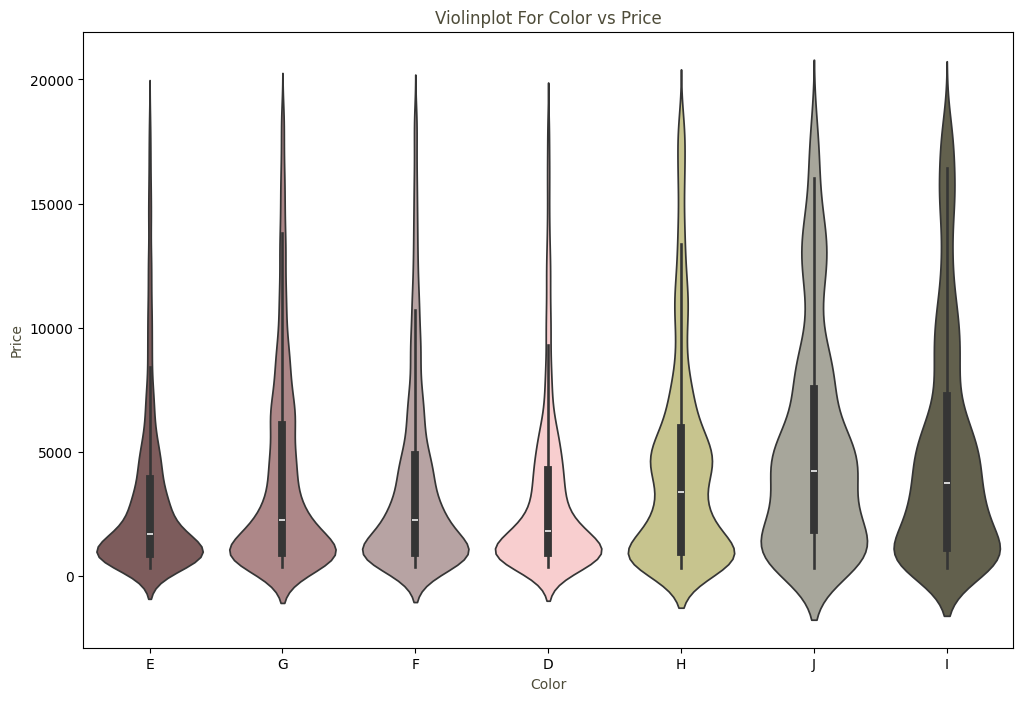

In [20]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\2657468092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")
C:\Users\rahul\AppData\Local\Temp\ipykernel_19340\2657468092.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

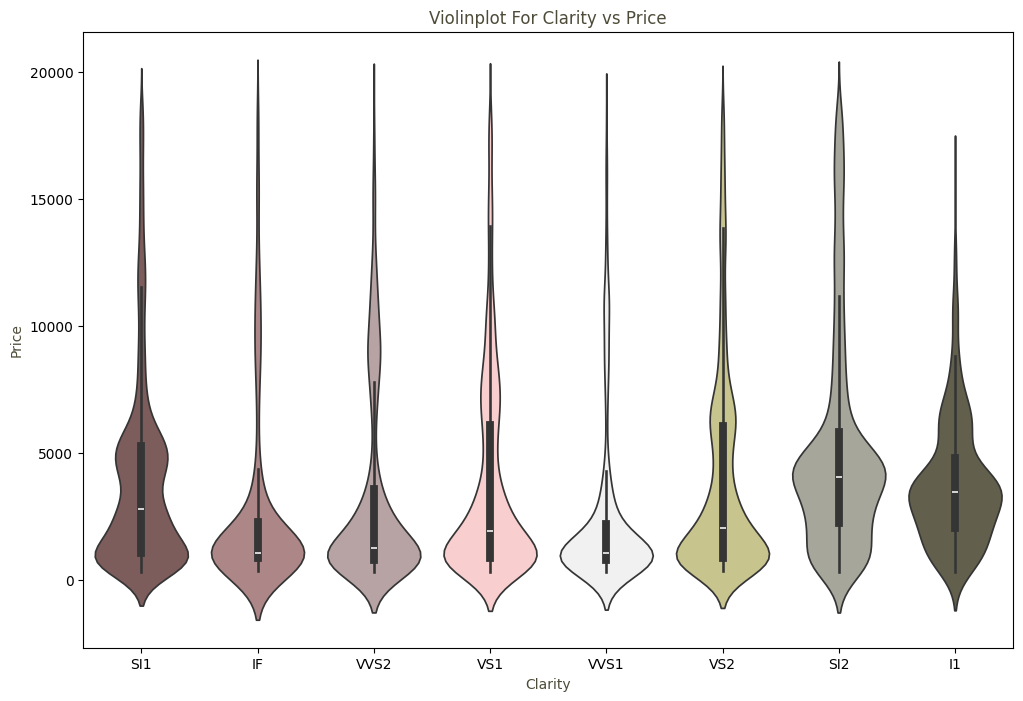

In [21]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Lable encoding the data to get rid of object dtype.

In [22]:
# Make copy to avoid changing original data 
label_data = data.copy()

In [23]:
label_data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [24]:
# mapping 
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [25]:
label_data['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [26]:
clarity_map = {  'SI2':2, 'I1':1,'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6,  'VVS1':7 ,'IF':8}

In [27]:
label_data['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [28]:
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [29]:
label_data['cut'] = data['cut'].map(cut_map) 
label_data['clarity'] = data['clarity'].map(clarity_map)
label_data['color'] = data['color'].map(color_map)

In [30]:
label_data.head()

carat  cut  color  clarity  depth  table     x     y     z  price
0   0.30    5      2        3   62.1   58.0  4.27  4.29  2.66    499
1   0.33    4      4        8   60.8   58.0  4.42  4.46  2.70    984
2   0.90    3      2        6   62.2   60.0  6.04  6.12  3.78   6289
3   0.42    5      3        5   61.6   56.0  4.82  4.80  2.96   1082
4   0.31    5      3        7   60.4   59.0  4.35  4.43  2.65    779

In [31]:
data.describe()

carat         depth         table             x             y  \
count  26948.000000  26948.000000  26948.000000  26948.000000  26948.000000   
mean       0.797624     61.744885     57.453778      5.729320      5.731184   
std        0.475872      1.393052      2.224463      1.125501      1.117300   
min        0.200000     50.800000     49.000000      3.730000      3.710000   
25%        0.400000     61.100000     56.000000      4.710000      4.710000   
50%        0.700000     61.800000     57.000000      5.690000      5.700000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        3.510000     73.600000     70.000000      9.660000      9.630000   

                  z         price  
count  26948.000000  26948.000000  
mean       3.537775   3936.110695  
std        0.695354   4020.787088  
min        2.060000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2374.500000  
75%        4.040000   5355.250000  
max        6.270000  18818.000000

<Axes: >

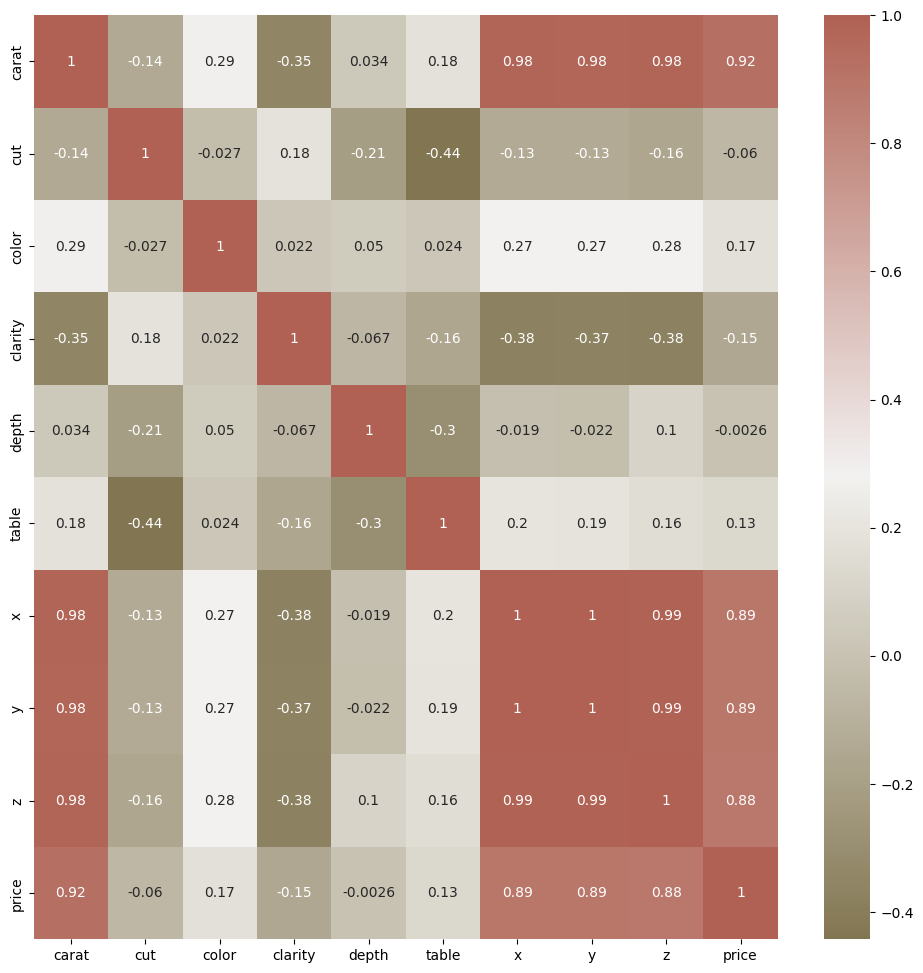

In [32]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=50, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y" and "z","carat" show a high correlation to the target column. 
* "depth", "cut" and "clarity" show low correlation. We could consider dropping but let's keep it. 

# Model Building

In [22]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [23]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [24]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -752.832514 
RandomForest: -548.170470 
KNeighbors: -823.649442 
XGBRegressor: -545.458107 


**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters. 

In [25]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [26]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.98108479806778
Adjusted R^2: 0.981072157032851
MAE: 278.09339997286685
MSE: 296738.36382521846
RMSE: 544.7369675588563


In [9]:
import pickle
with open("D:/Dimond_prise_prediction_project/model.pkl", "wb") as file:
    pickle.dump(pipeline_xgb, file)

NameError: name 'pipeline_xgb' is not defined